# Example 1. Authorizing an application to access Twitter account data

In [3]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'OYT3v8MByXqfVjdU49B64gQLB'
CONSUMER_SECRET ='QGFz5aa4CRXyVOWxgZQd2YxjcB5FjmK8y6QQkO39RdNbzOUJtG'
OAUTH_TOKEN = '571213367-rPC30Bje0chsADd0ZN5HSeceTTfhA1kmhDrrMpzL'
OAUTH_TOKEN_SECRET = 'iSIZ76kwufpqvEuBdBgsno9c9krRTNpzFUFGziTeeGsJz'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

# Example 2. Retrieving trends

In [4]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

for i in range(3):
    print(world_trends[0]['trends'][i]['query'])

%23G%C3%BCmb%C3%BCrG%C3%BCmb%C3%BCrBinali
Montreal
%23SONA2019


In [5]:
for i in range(3):
    print(us_trends[0]['trends'][i]['query'])

Montreal
Rays
%23SWEUSA


# Example 3. Displaying API responses as pretty-printed JSON

In [6]:
import json

#print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "Montreal",
    "url": "http://twitter.com/search?q=Montreal",
    "promoted_content": null,
    "query": "Montreal",
    "tweet_volume": 37539
   },
   {
    "name": "Rays",
    "url": "http://twitter.com/search?q=Rays",
    "promoted_content": null,
    "query": "Rays",
    "tweet_volume": 32933
   },
   {
    "name": "#SWEUSA",
    "url": "http://twitter.com/search?q=%23SWEUSA",
    "promoted_content": null,
    "query": "%23SWEUSA",
    "tweet_volume": null
   },
   {
    "name": "Expos",
    "url": "http://twitter.com/search?q=Expos",
    "promoted_content": null,
    "query": "Expos",
    "tweet_volume": null
   },
   {
    "name": "Roy Moore",
    "url": "http://twitter.com/search?q=%22Roy+Moore%22",
    "promoted_content": null,
    "query": "%22Roy+Moore%22",
    "tweet_volume": null
   },
   {
    "name": "#WorldRefugeeDay",
    "url": "http://twitter.com/search?q=%23WorldRefugeeDay",
    "promoted_content": null,
    "query": "%23WorldRefu

# Example 4. Computing the intersection of two sets of trends

In [7]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#SWEUSA', 'Roy Moore', '#CMRNZL', '#WizardsUnite', 'Tampa Bay', 'Rays', '#VideogameBandMashup', 'Gillibrand', 'Expos', '#Lights', '#Señorita', '#3FavoriteMutants', '#NEDCAN', 'Montreal'}


# Example 5. Collecting search results

In [8]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = '#Kanye' 

count = 1000

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses, indent=4))


Length of statuses 97
Length of statuses 192
Length of statuses 192
[
    {
        "created_at": "Thu Jun 20 19:00:56 +0000 2019",
        "id": 1141783003741466624,
        "id_str": "1141783003741466624",
        "text": "Faxts. That nigga #Kanye out here silent &amp; making Yall spend thousands to dress like bums silly. https://t.co/IihJInlF5p",
        "truncated": false,
        "entities": {
            "hashtags": [
                {
                    "text": "Kanye",
                    "indices": [
                        18,
                        24
                    ]
                }
            ],
            "symbols": [],
            "user_mentions": [],
            "urls": [
                {
                    "url": "https://t.co/IihJInlF5p",
                    "expanded_url": "https://twitter.com/saintbishopk/status/1141382979887017986",
                    "display_url": "twitter.com/saintbishopk/s\u2026",
                    "indices": [
                 

# Example 6. Extracting text, screen names, and hashtags from tweets

In [9]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "Faxts. That nigga #Kanye out here silent &amp; making Yall spend thousands to dress like bums silly. https://t.co/IihJInlF5p",
 "Took this pic of @kanyewest house while walking my dog around my neighborhood. Looks spooky \ud83d\udc7b\ud83d\udc7b#kanye #kanyewest\u2026 https://t.co/efs44yASEu",
 "Kids size #swimsuit available for the holidays at https://t.co/dF9IWOY9Ss eat your heart out #KourtneyKardashian &amp;\u2026 https://t.co/JFbWHVs9dV",
 "DigiTrax changes everything music https://t.co/YPEJJ4KiWH #ML #MachineLearning #AI #ArtificialIntelligence\u2026 https://t.co/OelFbpk6GA",
 "@ItsLadyR @perikoplazer Si llegan a ser #JayZ o #kanye les hubieran dado el permiso \ud83d\ude02. https://t.co/fBbKsunkNi"
]
[
 "kanyewest",
 "ItsLadyR",
 "perikoplazer",
 "kanyewest",
 "adidas"
]
[
 "Kanye",
 "kanye",
 "kanyewest",
 "swimsuit",
 "KourtneyKardashian"
]
[
 "Faxts.",
 "That",
 "nigga",
 "#Kanye",
 "out"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [10]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[('#Kanye', 54), ('the', 50), ('#kanye', 47), ('RT', 45), ('to', 32), ('a', 29), ('of', 27), ('on', 26), ('for', 25), ('is', 23)]
[('kanyewest', 13), ('KimKardashian', 7), ('Naledi2Princess', 5), ('twojskicks', 5), ('Digitraxent', 4), ('Power106LA', 4), ('cak3_walk', 4), ('expialadopeshxt', 4), ('adidas', 2), ('GaryAWilliams', 2)]
[('Kanye', 64), ('kanye', 55), ('ML', 17), ('MachineLearning', 17), ('AI', 17), ('ArtificialIntelligence', 17), ('hiphop', 14), ('kanyewest', 13), ('music', 12), ('DeepLearning', 9)]


# Example 8. Calculating lexical diversity for tweets

In [11]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.4804023586541797
0.5925925925925926
0.39067524115755625
15.015625


#  Example 9. Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

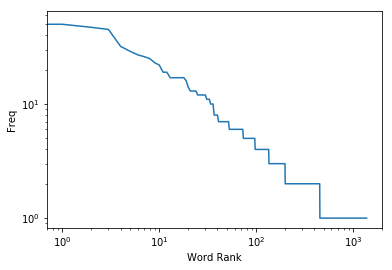

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")